# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Два и более высших образования', 'Неполное среднее', 'Ученая степень', 'Высшее', 'Неоконченное высшее', 'Среднее специальное'}


MARITAL_STATUS
{'Гражданский брак', 'Вдовец/Вдова', 'Состою в браке', 'Разведен(а)', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Энергетика', 'Салоны красоты и здоровья', 'Сборочные производства', 'Коммунальное хоз-во/Дорожные службы', 'СМИ/Реклама/PR-агенства', 'Логистика', 'Металлургия/Промышленность/Машиностроение', 'Строительство', 'Образование', 'Информационные услуги', 'Ресторанный бизнес/Общественное питание', 'Маркетинг', 'Транспорт', 'Нефтегазовая промышленность', 'Туризм', 'Юридические услуги/нотариальные услуги', 'ЧОП/Детективная д-ть', 'Химия/Парфюмерия/Фармацевтика', 'Сельское хозяйство', 'Информационные технологии', 'Управляющая компания', 'Подбор персонала', 'Государственная служба', 'Развлечения/Искусство', 'Наука', 'Страхование', 'Банк/Финансы', 'Другие сферы', 'Торговля', 'Недвижимость', 'Здравоохранение'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
# Можно посмотреть посмотреть все столбцы у которых есть пустые значения
emptyCount = df.isnull().sum()
for key in emptyCount.keys():
    if(emptyCount[key] > 0):
        # Если это объект, посмотрим какой категорией можно заменить NaN
        if str(df[key].dtype) == 'object':
            print(key)
            print(set(df[key]))
            print()
            # GEN_INDUSTRY имеет категорию Другие сферы, возможно NaN стоит отнести туда
            # GEN_TITLE Другое
            # ORG_TP_STATE добавить поле для других значений
            # ORG_TP_FCAPITAL видимо отнести к без участию, но так как два значения и наврятли будет третье, тут можно заменить 1 и 0
            # JOB_DIR, TP_PROVINCE, REGION_NM добавить Другое
        #Если это числовые значение, то заполнить нулями
        elif 'int' in str(df[key].dtype) or 'float' in str(df[key].dtype):
            print(key)
            print(df[key])
            print()

GEN_INDUSTRY
{nan, 'Энергетика', 'Сборочные производства', 'Салоны красоты и здоровья', 'Коммунальное хоз-во/Дорожные службы', 'СМИ/Реклама/PR-агенства', 'Логистика', 'Металлургия/Промышленность/Машиностроение', 'Строительство', 'Образование', 'Информационные услуги', 'Ресторанный бизнес/Общественное питание', 'Маркетинг', 'Нефтегазовая промышленность', 'Транспорт', 'Туризм', 'Юридические услуги/нотариальные услуги', 'ЧОП/Детективная д-ть', 'Химия/Парфюмерия/Фармацевтика', 'Сельское хозяйство', 'Информационные технологии', 'Управляющая компания', 'Подбор персонала', 'Государственная служба', 'Развлечения/Искусство', 'Наука', 'Страхование', 'Банк/Финансы', 'Другие сферы', 'Торговля', 'Недвижимость', 'Здравоохранение'}

GEN_TITLE
{nan, 'Военнослужащий по контракту', 'Руководитель среднего звена', 'Другое', 'Высококвалифиц. специалист', 'Работник сферы услуг', 'Специалист', 'Руководитель высшего звена', 'Рабочий', 'Руководитель низшего звена', 'Индивидуальный предприниматель', 'Служащий',

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [16]:
# Разложить каждое значение категории в отдельный столбец, например, если есть EDUCATION middle, high и т.д.
# То тогда будут столбцы EDUCATION_MIDDLE, EDUCATION_HIGH и их значение 1 или 0 в зависимости от того выбраны были ли они в категории

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [17]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    
    ## Your Code Here
    
    # Убираем идентификатор AGREEMENT_RK
    df_output = df_output.drop('AGREEMENT_RK', axis=1)
    
    # Меняем тип столбцов
    changeTypeFields = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for field in changeTypeFields:
        df_output[field] = df_output[field].map(lambda x: x.replace(',', '.')).astype('float')
        
    # Заполняем нулями пропуски числовых типов
    emptyValues = df_output.isnull().sum()
    for field in emptyValues.keys():
        if emptyValues[field] > 0:
            if 'int' in str(df_output[field].dtype) or 'float' in str(df_output[field].dtype):
                df_output[field] = df_output[field].fillna(0)
            
    encoding_columns = []
    for field in df_output.columns:
        if str(df_output[field].dtype) == 'object':
            encoding_columns.append(field)
            
    df_output = pd.get_dummies(df_output, columns=encoding_columns)
    
    return df_output

preproc_data(df)

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ,sample_test,sample_train
0,0,30,1,0,1,1,1,7000.0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,48,0,1,1,0,0,4100.0,1,1,...,0,0,0,0,1,0,0,0,1,0
2,0,35,1,0,0,1,0,40000.0,1,1,...,0,0,0,0,0,1,0,0,1,0
3,0,22,1,0,0,0,0,20000.0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,0,27,1,0,1,2,2,17000.0,1,1,...,0,0,0,0,0,0,0,0,1,0
5,0,44,0,1,0,2,2,7000.0,1,1,...,0,1,0,0,0,0,0,0,1,0
6,0,57,1,0,1,0,0,10000.0,1,1,...,0,0,0,1,0,0,0,0,1,0
7,0,33,1,0,1,2,2,7500.0,1,1,...,0,0,0,0,0,0,0,0,1,0
8,0,53,0,1,1,2,0,9000.0,1,1,...,0,0,0,0,0,0,0,0,1,0
9,1,33,1,0,0,1,0,4000.0,1,1,...,1,0,0,0,0,0,0,0,1,0


In [18]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample_train == 1').drop(['sample_train', 'sample_test'], axis=1)
df_test_preproc  = df_preproc.query('sample_test == 1').drop(['sample_train', 'sample_test'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [19]:
X = df_train_preproc.drop('TARGET', axis=1)
X_test = df_test_preproc.drop('TARGET', axis=1)

y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [20]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
x_train, x_tes, y_train, y_tes = train_test_split(X, y, test_size=0.3, random_state=42)

C:\Users\Pronin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

# Проверим какой классификатор угадал больше
def checkMatch(x_train, y_train, x_tes, y_tes):
    classifiers = [DecisionTreeClassifier, RandomForestClassifier, LogisticRegression]
    
    # Проходим по классификаторам и выводим по ним инфу
    for classifier in classifiers:
        model = classifier()
        model.fit(x_train, y_train)
        predict = model.predict(x_tes)
        predictProba = model.predict_proba(x_tes)
        print('_'*15)
        print(str(classifier))
        i = 0
        key = 0
        proba = []
        
        # Проходим по предсказанным данным и верным результатам
        for y_tr, y_te in list(zip(predict, y_tes)):
            # Сравниваем совпадение предсказаний и верных результатов, если да записываем в счетчик верно предсказанных +1
            # и заполняем массив насколько точно предсказали правильный ответ
            if y_tr == y_te:
                i += 1
                proba.append(predictProba[key][y_tr])
                
            key +=1
        # Выводим количество совпадений и сколько всего
        print('match:', i, '/ all:', y_tes.count())
        # Выводим массив насколько уверенны были в правильном ответе
        print('proba match:', proba)
        
checkMatch(x_train, y_train, x_tes, y_tes)

# Вывод LogisticRegression угадал больше
# Но уверенее DeсisionTree

C:\Users\Pronin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


_______________
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
match: 3657 / all: 4567
proba match: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

_______________
<class 'sklearn.ensemble.forest.RandomForestClassifier'>
match: 4000 / all: 4567
proba match: [0.7, 0.7, 0.7, 0.8, 0.8, 0.9, 0.7, 0.9, 0.7, 0.9, 0.7, 0.9, 0.8, 1.0, 1.0, 0.9, 1.0, 0.9, 1.0, 0.9, 0.9, 0.9, 1.0, 0.9, 0.7, 0.9, 0.7, 1.0, 0.9, 0.8, 0.8, 1.0, 0.8, 0.9, 1.0, 0.9, 0.9, 0.9, 1.0, 0.8, 1.0, 0.7, 0.8, 0.7, 0.8, 0.8, 1.0, 0.7, 1.0, 0.6, 0.8, 0.9, 1.0, 0.9, 0.9, 0.9, 0.6, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0, 1.0, 0.9, 0.9, 1.0, 0.7, 0.9, 1.0, 0.9, 1.0, 1.0, 0.8, 1.0, 1.0, 0.9, 1.0, 0.8, 0.9, 0.9, 1.0, 0.7, 0.9, 0.5, 1.0, 1.0, 0.6, 1.0, 1.0, 0.8, 1.0, 0.6, 0.8, 0.9, 0.9, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 0.9, 1.0, 0.9, 1.0, 1.0, 1.0, 0.9, 0.8, 0.7, 0.9, 1.0, 1.0, 0.9, 0.7, 1.0, 0.9, 1.0, 0.9, 0.9, 1.0, 0.8, 0.7, 0.8, 1.0, 0.9, 0.8, 1.0, 0.7, 0.9, 1.0, 0.9, 0.9, 0.9, 1.0, 0.8, 1.0, 0.9, 0.8, 0.9, 0.9, 0.9, 0.9, 0.8, 1.0, 0.8, 1.0, 1.0, 0.9, 0.8, 1.0, 0.9, 0.8, 0.9, 0.9, 1.0, 0.6, 1.0, 1.0, 0.9, 0.9, 0.6, 0.8, 1.0, 0.9, 0.7, 0.8, 1.0, 1.0, 1.0, 0.8, 0.9,

_______________
<class 'sklearn.linear_model.logistic.LogisticRegression'>
match: 4009 / all: 4567
proba match: [0.7292682869187166, 0.9419810508775561, 0.7936685467124034, 0.8271015631873997, 0.8699626693522644, 0.8898386683068888, 0.8322632660217346, 0.8059968635777024, 0.8848738156571002, 0.7931552464730834, 0.730491147374031, 0.9179496395680532, 0.8061810058283975, 0.8948174676275569, 0.8734473401493683, 0.8782259358866243, 0.8545452142683665, 0.9338158904438387, 0.9528825397182763, 0.8158977063927147, 0.9385171620675435, 0.8763786077361421, 0.8903412603051772, 0.839529940608011, 0.9176664370266726, 0.8307359478935132, 0.7850638330800614, 0.9602424397367871, 0.8861681374005037, 0.8620555625736981, 0.908221749644316, 0.6944858818786592, 0.8526347215274982, 0.9043448947429373, 0.968038456966252, 0.9113510991923193, 0.8661989690804153, 0.9019532207776829, 0.9506438106353867, 0.9459499689886468, 0.9275680098163518, 0.8233640729587807, 0.8095820971855909, 0.946747558374202, 0.9333180257

In [49]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
def getMetric(x_train, y_train, x_tes, classifier):
    model = classifier()
    model.fit(x_train, y_train)
    predict = model.predict(x_tes)
    return {
        'classifier' : classifier.__name__,
        'accuracy' : accuracy_score(y_tes, predict), 
        'precision' : precision_score(y_tes, predict), 
        'recall' : recall_score(y_tes, predict)
    }

metrics = [
    getMetric(x_train, y_train, x_tes, DecisionTreeClassifier),
    getMetric(x_train, y_train, x_tes, RandomForestClassifier),
    getMetric(x_train, y_train, x_tes, LogisticRegression)
]

for metric in metrics:
    print(metric)

{'classifier': 'DecisionTreeClassifier', 'accuracy': 0.7983358878913948, 'precision': 0.15730337078651685, 'recall': 0.15135135135135136}
{'classifier': 'RandomForestClassifier', 'accuracy': 0.8782570615283556, 'precision': 0.4782608695652174, 'recall': 0.01981981981981982}
{'classifier': 'LogisticRegression', 'accuracy': 0.877819137289249, 'precision': 0.2857142857142857, 'recall': 0.0036036036036036037}


C:\Users\Pronin\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Pronin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


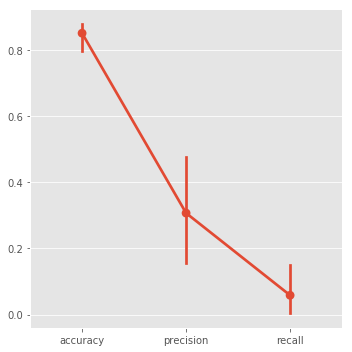

In [63]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here

# Prepare the data
#model = DecisionTreeClassifier()
#model.fit(x_train, y_train)
#predict = model.predict(x_tes)
#predictProba = model.predict_proba(x_tes)
#x = np.linspace(y_tes, predictProba)

# Plot the data
#plt.plot(predictProba, y_tes, label='linear')

# Add a legend
#plt.legend()

# Show the plot
#plt.show()
import seaborn as sns

decisionTreeClassifier = getMetric(x_train, y_train, x_tes, DecisionTreeClassifier)
randomForestClassifier = getMetric(x_train, y_train, x_tes, RandomForestClassifier)
logisticRegression = getMetric(x_train, y_train, x_tes, LogisticRegression)

data = pd.DataFrame(data=metrics)
sns.factorplot(data=data)

ROC AUC DecisionTree(blue) 0.5258431911472788
ROC AUC RandomForest(red) 0.5976103221865935
ROC AUC LogisticRegression(black) 0.6367945712412314


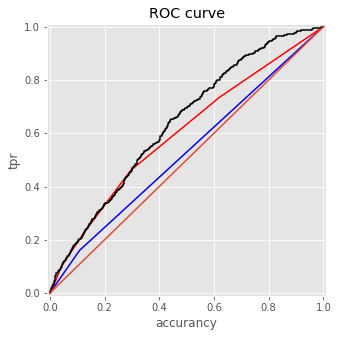

In [76]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve

def getProba(x_tes, x_train, y_train, classifier):  
    model = classifier()
    model.fit(x_train, y_train)
    predict = model.predict(x_tes)
    return model.predict_proba(x_tes)

probaDecisionTree = getProba(x_tes, x_train, y_train, DecisionTreeClassifier)
probaRandomForest = getProba(x_tes, x_train, y_train, RandomForestClassifier)
probaLogisticRegression = getProba(x_tes, x_train, y_train, LogisticRegression)

plt.figure(figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(y_tes, probaDecisionTree[:,1])
plt.plot(fpr, tpr, color="blue")
fpr, tpr, thresholds = roc_curve(y_tes, probaRandomForest[:,1])
plt.plot(fpr, tpr, color="red")
fpr, tpr, thresholds = roc_curve(y_tes, probaLogisticRegression[:,1])
plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('accurancy')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print('ROC AUC DecisionTree(blue)', roc_auc_score(y_tes, probaDecisionTree[:,1]))
print('ROC AUC RandomForest(red)', roc_auc_score(y_tes, probaRandomForest[:,1]))
print('ROC AUC LogisticRegression(black)', roc_auc_score(y_tes, probaLogisticRegression[:,1]))

In [118]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lr  = LogisticRegression()

cross_dtc = cross_val_score(
    dtc,
    x_train,
    y_train,
    scoring='roc_auc',
    cv=10
)

cross_rfc = cross_val_score(
    rfc,
    x_train,
    y_train,
    scoring='roc_auc',
    cv=10
)

cross_lr = cross_val_score(
    lr,
    x_train,
    y_train,
    scoring='roc_auc',
    cv=10
)

In [119]:
print('DecisionTreeClassifier: ', cross_dtc)
print('Среднее: ', np.mean(cross_dtc))
print()

print('RandomForestClassifier: ', cross_rfc)
print('Среднее: ', np.mean(cross_rfc))
print()

print('LogisticRegression: ', cross_lr)
print('Среднее: ', np.mean(cross_lr))
print()

DecisionTreeClassifier:  [0.5383232  0.55051503 0.51426883 0.53058933 0.52081223 0.53991895
 0.51451368 0.52951064 0.5036383  0.52221938]
Среднее:  0.5264309554560728

RandomForestClassifier:  [0.57674772 0.591692   0.59641591 0.56537487 0.58159406 0.56874789
 0.56534954 0.54408936 0.55361277 0.59078168]
Среднее:  0.5734405796116285

LogisticRegression:  [0.6702381  0.61605032 0.62712766 0.64960317 0.62051672 0.60002533
 0.63129855 0.63968511 0.62748936 0.58871991]
Среднее:  0.6270754227535168



In [123]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

## Your Code Here
x_train, x_tes, y_train, y_tes = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)
predict = model.predict(x_tes)
predict_proba = model.predict_proba(x_tes)
print(predict)
print(predict_proba)

[0 0 0 ... 0 0 0]
[[0.85560449 0.14439551]
 [0.91624024 0.08375976]
 [0.8850669  0.1149331 ]
 ...
 [0.88583888 0.11416112]
 [0.85025002 0.14974998]
 [0.90652319 0.09347681]]


ROC AUC Test 0.607886348567304


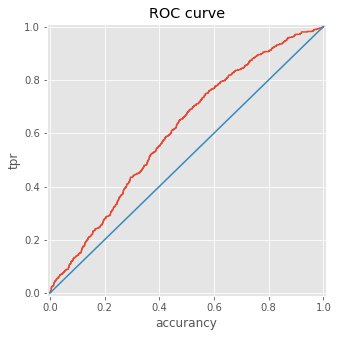

In [125]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)
plt.figure(figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(y_tes, predict_proba[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('accurancy')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print('ROC AUC Test', roc_auc_score(y_tes, predict_proba[:,1]))

## Your Code Here

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [ ]:
### И далее ;)